# Source 
https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid4.ipynb

In [2]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Position confined to some 1D path: $x=x(\theta)$ and $y=y(\theta)$ A few examples

Parabola: $x = \theta$ and $y=\theta^2$

Simple Pendulum: $x = \cos(\theta)$ and $y=\sin(\theta)$

Tautochrone: $x = \sin(2\theta) + 2\theta$ and $y=1-\cos(2 \theta)$

Many more ...
Kinetic Energy: $ T = \frac{1}{2}m (\dot{x}^2 + \dot{y}^2) $
Potential Energy: $ V = mgy $
The Lagrangian: $L = T- V $
Lagranges Equation: $\frac{dL}{d\theta} - \frac{d}{dt} \frac{dL}{d\dot{\theta}} = 0

Define variables

In [ ]:

t, m, g = smp.symbols('t m g')
the = smp.symbols(r'\theta', cls=smp.Function)
the = the(t)
the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)

In [ ]:
the_dd

Derivative(\theta(t), (t, 2))


Make sure $x$ and $y$ are functions of $\theta$

In [ ]:
x, y = smp.symbols('x y', cls=smp.Function)
x = x(the)
y = y(the)


Define $x$ and $y$

In [ ]:
path='taut'
if path=='taut':
    x = smp.sin(2*the) + 2*the
    y = 1 - smp.cos(2*the)
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
if path=='parab':
    x = the
    y = the**2
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)


Define $T$, $V$, and $L$

In [ ]:

T = 1/2 * m * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
V = m*g*y
L = T-V

In [ ]:
L

-g*m*(1 - cos(2*\theta(t))) + 0.5*m*((2*cos(2*\theta(t))*Derivative(\theta(t), t) + 2*Derivative(\theta(t), t))**2 + 4*sin(2*\theta(t))**2*Derivative(\theta(t), t)**2)


Compute $\frac{dL}{d\theta} - \frac{d}{dt} \frac{dL}{d\dot{\theta}}$ (which is equal to zero:Lagranges equation)

In [ ]:

LE = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE = LE.simplify()

In [ ]:
LE

m*(-2.0*g*sin(2*\theta(t)) + 8.0*sin(2*\theta(t))*Derivative(\theta(t), t)**2 - 8.0*cos(2*\theta(t))*Derivative(\theta(t), (t, 2)) - 8.0*Derivative(\theta(t), (t, 2)))

Solve for $d^2 \theta / dt^2 $ so we can solve it with an ODE solver. Our system of equations will then be
$ \frac{d \theta}{dt} = \omega$$$$\frac{d \omega}{dt} = \frac{d^2 \theta}{dt^2} =  \text{whatever is returned} $

In [ ]:
deriv_2 =smp.solve(LE, the_dd)[0]
deriv_1 = the_d

In [ ]:
#deriv_2
display(deriv_2)

0.25*(-g + 4.0*Derivative(\theta(t), t)**2)*tan(\theta(t))

Convert this into a numpy expression:

In [ ]:
deriv2_f = smp.lambdify((g, the, the_d), deriv_2)
deriv1_f = smp.lambdify(the_d, the_d)

print


Create ODE

In [ ]:

def dSdt(S, t):
    return [
        deriv1_f(S[1]), #dtheta/dt
        deriv2_f(g, S[0], S[1]) #domega/dt
    ]

print(type(dSdt))

<class 'function'>


Solve

In [ ]:

t = np.linspace(0, 20, 1000)
g = 9.81
ans1 = odeint(dSdt, y0=[np.pi/4, 0], t=t)
ans2 = odeint(dSdt, y0=[np.pi/5, 0], t=t)

print(type(ans1))
print(ans1.shape)
display(ans1)

<class 'numpy.ndarray'>
(1000, 2)


array([[ 0.78539816,  0.        ],
       [ 0.78490684, -0.04906694],
       [ 0.78343483, -0.09794177],
       ...,
       [ 0.77306439,  0.24298256],
       [ 0.77745807,  0.19580961],
       [ 0.78089968,  0.14789764]])

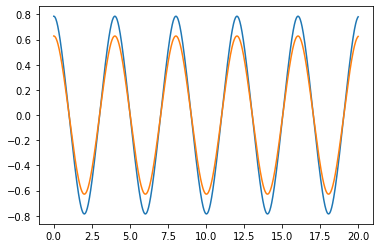

In [ ]:

plt.plot(t,ans1.T[0])
plt.plot(t,ans2.T[0])

In [ ]:

def get_xy(theta):
    return x_f(theta), y_f(theta)

In [ ]:

x1, y1 = get_xy(ans1.T[0])
x2, y2 = get_xy(ans2.T[0])

Der Verlauf des Pendels wurde 

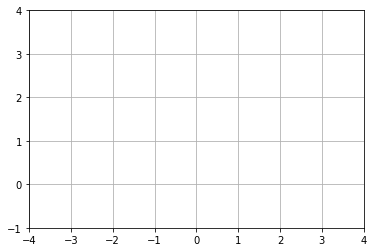

In [ ]:
def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-1, 4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
#ani.save('pen.gif',writer='pillow',fps=50)


In [ ]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
import numpy as np

x = smp.Symbol('x')
func = smp.sin(x)
display(func)

$ \frac{1}{2} $
$$ \frac{1}{2} $$